# Pernyataan

Perusahaan asuransi bernama "Sure Tomorrow" ingin menyelesaikan beberapa masalah dengan bantuan *machine learning*. Anda pun diminta untuk mengevaluasi kemungkinan tersebut.

- Tugas 1: Temukan klien yang mirip dengan kriteria klien tertentu. Tugas ini akan memudahkan perusahaan untuk melakukan pemasaran.
- Tugas 2: Prediksi apakah klien baru kemungkinan akan mengambil klaim asuransi. Apakah prediksi model lebih baik daripada prediksi model *dummy*?
- Tugas 3: Prediksi besaran klaim asuransi yang mungkin diterima klien baru menggunakan model regresi linear.
- Tugas 4: Lindungi data pribadi klien tanpa merusak model dari tugas sebelumnya. Sangatlah penting untuk mengembangkan algoritme transformasi data yang dapat mencegah penyalahgunaan informasi pribadi klien jika data tersebut jatuh ke tangan yang salah. Hal ini disebut penyembunyian data atau pengaburan data. Namun, prosedur perlindungan datanya pun perlu diperhatikan agar kualitas *model machine* learning tidak menurun. Di sini, Anda tidak perlu memilih model yang terbaik, cukup buktikan bahwa algoritme Anda bekerja secara akurat.

## Pra-pemrosesan & Eksplorasi Data

### Inisialisasi

In [1]:
pip install scikit-learn --upgrade

  Using cached scikit_learn-1.5.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.5.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
#memasukkan semua library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

### Muat Data

Muat data dan lakukan pemeriksaan untuk memastikan data bebas dari permasalahan.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Kami mengganti nama kolom untuk membuat kode terlihat lebih konsisten dengan gayanya.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
2769,1,23.0,32800.0,4,0
4781,1,40.0,37400.0,2,0
1151,0,32.0,38300.0,2,0
862,1,36.0,34600.0,1,0
1584,1,19.0,51800.0,1,0
461,0,42.0,58400.0,1,1
2652,0,31.0,37600.0,0,0
3632,1,26.0,45300.0,3,0
2961,1,22.0,41500.0,1,0
2274,1,41.0,30200.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


data berisikan 5 kolom dan memiliki 5000 data, kolom `age` memiliki tipe data yang salah, diputuskan untuk mengubahnya terlebih dahulu, tidak terdapat data hilang pada dataset

In [7]:
# Anda mungkin ingin mengganti tipe data untuk kolom age (dari float ke int), tetapi ini tidak terlalu penting untuk dilakukan
# ketik kode untuk mengubah tipe data di sini jika Anda memilih untuk melakukannya:
df['age'] = df['age'].astype('int64')

In [8]:
# periksa apakah proses pengubahannya sudah berhasil
df['age'].dtypes

dtype('int64')

In [9]:
# Sekarang, amati statistika deskriptif dari data kita. 
# Apakah semuanya sudah benar?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [10]:
# mengecek duplikasi pada dataset
df.duplicated().sum()

153

disini terlihat bahwa terdapat banyak data yang terduplikasi, akan tetapi tidak bisa dipastikan karena data tidak memiliki kode unik dan hanya data umum, maka diputuskan untuk membiarkannya terlebih dahulu

**Kesimpulan:** dataset berisikan 5 kolom dan 5000 data, kolom `age` berisikan tipe data yang salah sehingga harus diubah terlebih dahulu, terdapat beberapa data yang terduplikasi akan tetapi tidak dapat dipastikan pengaruhnya karena tidak ada kode unik per kolomnya sehingga diputuskan dibiarkan terlebih dahulu

### EDA

Mari kita periksa dengan cepat, apakah ada kelompok pelanggan tertentu dengan melihat plot pasangan?

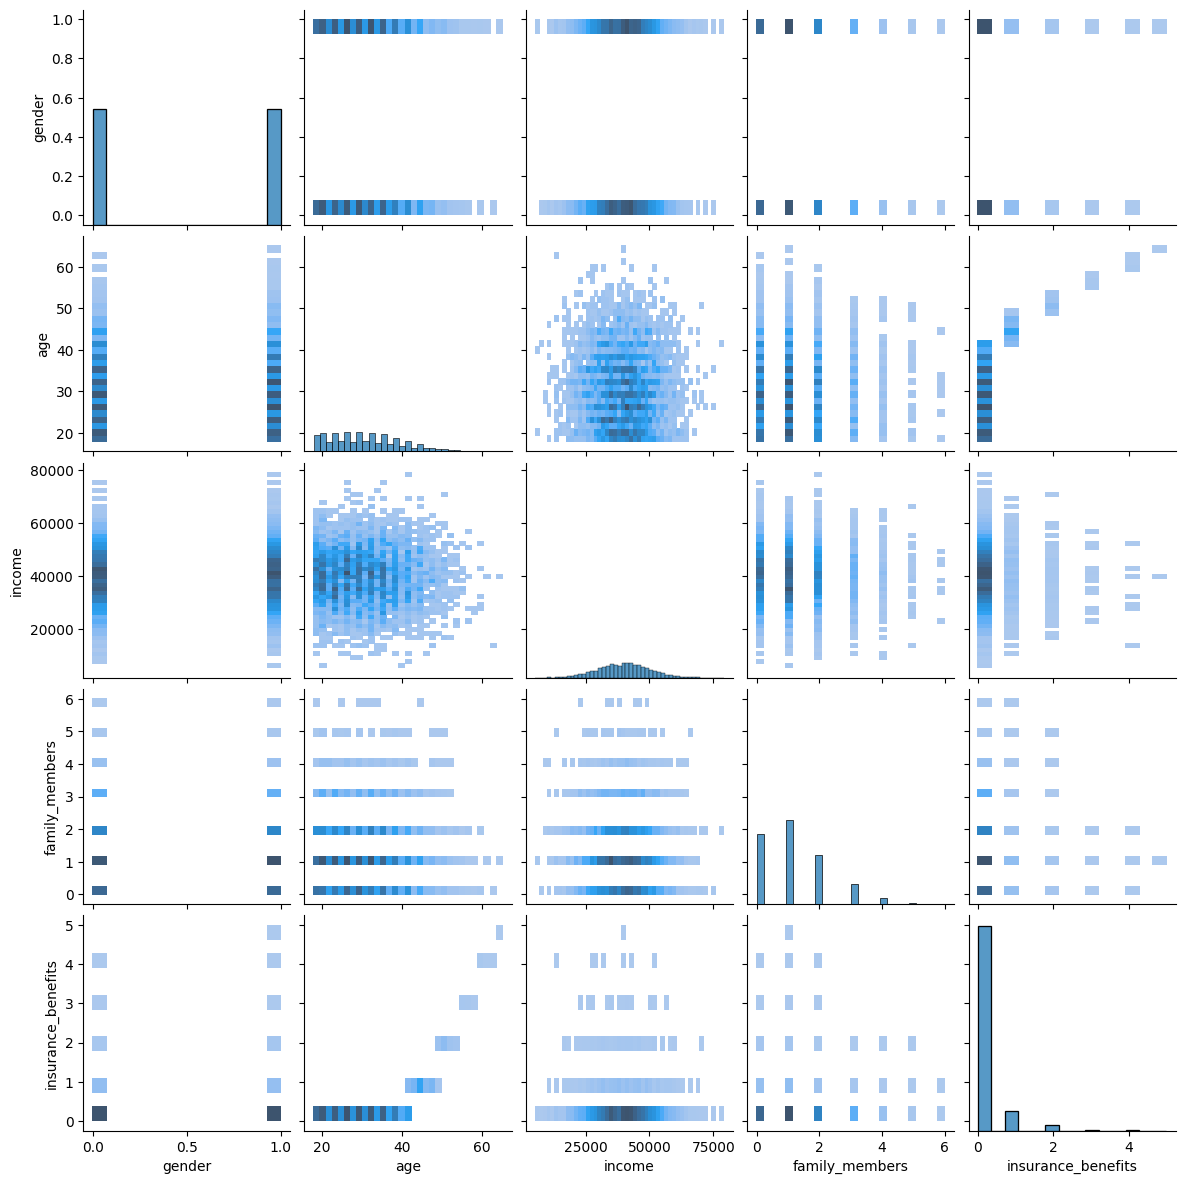

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Baiklah, sepertinya agak sulit untuk melihat kelompok (klaster) yang jelas mengingat sulitnya menggabungkan beberapa variabel secara bersamaan (untuk menganalisis distribusi multivariat). Namun, itulah gunanya LA dan ML di sini.

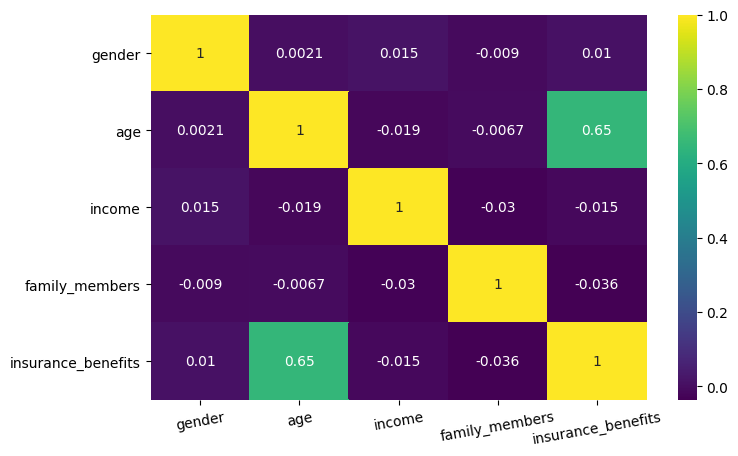

In [12]:
# mengecek korelasi menggunakan tabel korelasi
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.xticks(rotation=10)
plt.show()

dapat dilihat bahwa kolom `insurance_benefits` memiliki korelasi yang tinggi dengan `age`

## Tugas 1. Klien yang Mirip

Dalam bahasa pemrograman ML, penting untuk mengembangkan prosedur yang bisa menentukan *k-nearest neighbors* (objek) pada objek tertentu berdasarkan jarak antar objek.

Anda mungkin ingin mengulas kembali pelajaran berikut (bab -> pelajaran)
- Jarak Antar Vektor -> Jarak Euklides
- Jarak Antar Vektor -> Jarak Manhattan

Untuk menyelesaikan tugas ini, kita bisa mencoba beberapa metrik jarak.

Buatlah sebuah fungsi yang menampilkan *k-nearest neighbors* terdekat untuk objek ke-n berdasarkan metrik jarak tertentu.  Besarnya klaim asuransi yang diterima tidak perlu diperhitungkan dalam tugas ini.

Anda bisa menggunakan implementasi algoritme kNN yang sudah tersedia di Scikit-learn  (periksa [tautan](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) ini) atau menggunakan punya Anda sendiri.

Uji algoritme tersebut untuk empat kombinasi dari dua kasus
- Penskalaan
  - data tidak diskalakan
  - data diskalakan dengan [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Metrik Jarak
  - Euklides
  - Manhattan

Jawablah pertanyaan-pertanyaan berikut:
- Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?
- Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [14]:
def get_knn(df, n, k, metric):
    
    """
    Menampilkan k nearest neighbors

    :param df: DataFrame Pandas digunakan untuk menemukan objek-objek yang mirip di dalamnya
    :param n: nomor objek yang dicari k nearest neighbors
    :param k: jumlah k nearest neighbors yang ditampilkan
    :param metric: nama metrik jarak
    """

    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, metric=metric) 
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

selanjutnya kita perlu mengatur skala data.

In [15]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [16]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
438,0.0,0.553846,0.459494,0.166667,0
4075,0.0,0.292308,0.598734,0.333333,0
2186,1.0,0.523077,0.425316,0.166667,0
2989,1.0,0.615385,0.486076,0.000000,0
1321,1.0,0.507692,0.311392,0.166667,0


Sekarang, mari kita dapatkan catatan yang mirip untuk setiap kombinasi yang ada

### Membandingkan Hasil KNN Menggunakan Dataset Asli dan Dataset Skala

In [17]:
# hasil KNN menggunakan dataset asli
without_scale = get_knn(df=df,n=100,k=10,metric='euclidean')
without_scale

,gender,age,income,family_members,insurance_benefits,distance
100,0,19,37300.0,1,0,0.000000
4278,1,19,37300.0,2,0,1.414214
1831,0,20,37300.0,2,0,1.414214
2624,1,19,37300.0,0,0,1.414214
1086,0,22,37300.0,3,0,3.605551
1806,1,23,37300.0,0,0,4.242641
3447,1,25,37300.0,0,0,6.164414
568,1,27,37300.0,0,0,8.124038
4580,1,27,37300.0,0,0,8.124038
168,0,30,37300.0,0,0,11.045361


In [18]:
#melihat variasi jarak
without_scale['distance'].value_counts()

1.414214     3
8.124038     2
0.000000     1
4.242641     1
3.605551     1
6.164414     1
11.045361    1
Name: distance, dtype: int64

terlihat bahwa tanpa skala variasi `distance` berada sangat jauh antara 1 sama lain dan beberapa kali terdapat pengulangan.

In [19]:
# hasil KNN menggunakan dataset skala
with_scale = get_knn(df=df_scaled,n=100,k=10,metric='euclidean')
with_scale

,gender,age,income,family_members,insurance_benefits,distance
100,0.0,0.292308,0.472152,0.166667,0,0.000000
4915,0.0,0.292308,0.477215,0.166667,0,0.005063
243,0.0,0.292308,0.467089,0.166667,0,0.005063
1323,0.0,0.292308,0.456962,0.166667,0,0.015190
811,0.0,0.307692,0.470886,0.166667,0,0.015437
4843,0.0,0.307692,0.469620,0.166667,0,0.015592
4524,0.0,0.276923,0.467089,0.166667,0,0.016196
1648,0.0,0.276923,0.465823,0.166667,0,0.016636
3060,0.0,0.307692,0.463291,0.166667,0,0.017754
2795,0.0,0.276923,0.482278,0.166667,0,0.018418


In [20]:
#melihat variasi jarak
with_scale['distance'].value_counts()

0.000000    1
0.005063    1
0.005063    1
0.015190    1
0.018418    1
0.016196    1
0.017754    1
0.015592    1
0.016636    1
0.015437    1
Name: distance, dtype: int64

terlihat bahwa dengan skala, variasi `distance` menjadi lebih dekat tidak sejauh saat tanpa menggunakan skala

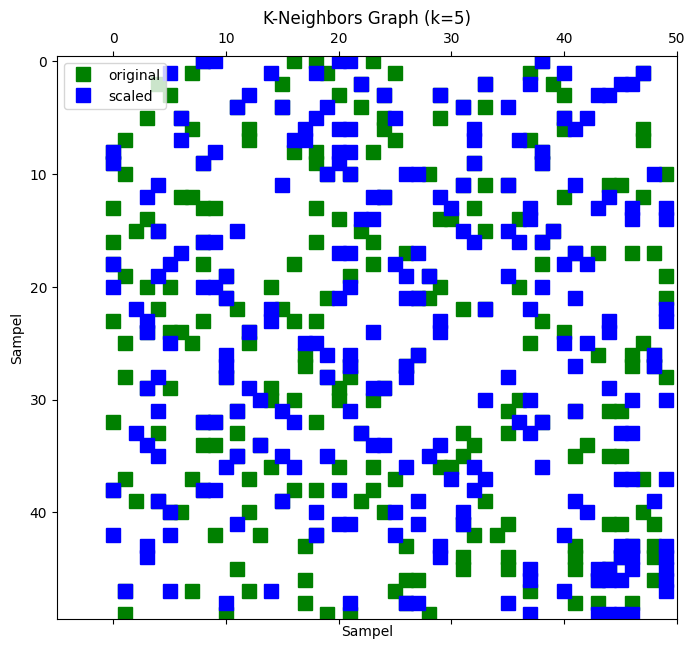

In [21]:
# visualisasi bentuk k-nearest neighbor untuk dataset original dan dataset scaled
k = 5
n = 50
graph_ori = kneighbors_graph(df.head(n).to_numpy(),n_neighbors=k,mode='distance')
graph_scale = kneighbors_graph(df_scaled.head(n).to_numpy(),n_neighbors=k,mode='distance')
plt.figure(figsize=(8, 8))
plt.spy(graph_ori, markersize=10,c='g',label='original')
plt.spy(graph_scale, markersize=10,c='blue',label='scaled')
plt.title(f'K-Neighbors Graph (k={k})')
plt.xlabel('Sampel')
plt.ylabel('Sampel')
plt.legend()
plt.xlim(-5,n)
plt.show()

**Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?** 
Dari hasil perhitungan menggunakan metric `euklides` antara dataset original dan dataset scaling, bahwa pada dataset scaling memberikan jarak yang lebih dekat jika dibandingkan dengan dataset original. Visualiasi juga mendukung dimana untuk dataset scaling, data lebih sering berkumpul dan jaraknya pendek jika dibandingkan dengan dataset original.

### Membandingkan Hasil KNN Menggunakan Metrik Euklides dan Manhattan

In [22]:
# KNN menggunakan metrik `manhattan` tanpa skala
manh_nonscale = get_knn(df=df,n=100,k=10,metric='manhattan')
manh_nonscale

,gender,age,income,family_members,insurance_benefits,distance
100,0,19,37300.0,1,0,0.0
2624,1,19,37300.0,0,0,2.0
1831,0,20,37300.0,2,0,2.0
4278,1,19,37300.0,2,0,2.0
1086,0,22,37300.0,3,0,5.0
1806,1,23,37300.0,0,0,6.0
3447,1,25,37300.0,0,0,8.0
4580,1,27,37300.0,0,0,10.0
568,1,27,37300.0,0,0,10.0
168,0,30,37300.0,0,0,12.0


In [23]:
#melihat variasi jarak
manh_nonscale['distance'].value_counts()

2.0     3
10.0    2
0.0     1
6.0     1
8.0     1
12.0    1
5.0     1
Name: distance, dtype: int64

terlihat bahwa kolom `distance` memiliki nilai yang sangat jauh pada rentang 0-12.

In [24]:
# KNN menggunakan metrik `manhattan` menggunakan skala
manhattan = get_knn(df=df_scaled,n=100,k=10,metric='manhattan')
manhattan

,gender,age,income,family_members,insurance_benefits,distance
100,0.0,0.292308,0.472152,0.166667,0,0.000000
4915,0.0,0.292308,0.477215,0.166667,0,0.005063
243,0.0,0.292308,0.467089,0.166667,0,0.005063
1323,0.0,0.292308,0.456962,0.166667,0,0.015190
811,0.0,0.307692,0.470886,0.166667,0,0.016650
4843,0.0,0.307692,0.469620,0.166667,0,0.017916
4524,0.0,0.276923,0.467089,0.166667,0,0.020448
4630,0.0,0.292308,0.450633,0.166667,0,0.021519
1648,0.0,0.276923,0.465823,0.166667,0,0.021714
3060,0.0,0.307692,0.463291,0.166667,0,0.024245


In [25]:
#melihat variasi jarak
manhattan['distance'].value_counts()

0.000000    1
0.005063    1
0.005063    1
0.015190    1
0.024245    1
0.020448    1
0.016650    1
0.017916    1
0.021519    1
0.021714    1
Name: distance, dtype: int64

terlihat bahwa kolom `distance` saat ini sudah memiliki nilai dengan rentang yang tidak jauh berbeda, untuk membandingkan dengan metrik eucladean mari kita keluarkan lagi nilainya.

In [26]:
#melihat kembali nilai distances pada metrik eucladean
with_scale['distance'].value_counts()

0.000000    1
0.005063    1
0.005063    1
0.015190    1
0.018418    1
0.016196    1
0.017754    1
0.015592    1
0.016636    1
0.015437    1
Name: distance, dtype: int64

**Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?** 

terlihat hasil yang didapatkan setelah melakukan skala memiliki rentang yang cukup dekat, sedangkan saat tidak lakukan skala maka jaraknya akan cukup besar. metrik eucladean dan manhattan memiliki nilai yang berbeda akan tetapi tidak sangat jauh berbeda, nilai pada metrik eucladean cenderung lebih rendah dibandingkan dengan nilai pada metrik manhattan

## Tugas 2. Apakah klien kemungkinan menerima klaim asuransi?

Dalam konteks *machine learning*, tugas ini sama seperti tugas klasifikasi biner.

Dengan target insurance_benefits yang lebih dari nol, coba evaluasi apakah model klasifikasi kNN merupakan pendekatan yang lebih baik daripada model *dummy*.

Instruksi:
- Buat pengklasifikasi berbasis KNN dan ukur kualitasnya dengan metrik F1 untuk k=1..10 bagi data asli dan data yang diskalakan. Akan menarik untuk melihat bagaimana k dapat memengaruhi metrik evaluasi, dan apakah penskalaan data membuat hasilnya berbeda. Gunakan implementasi algoritme klasifikasi kNN yang tersedia di Scikit-learn (periksa [tautan ini](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) atau gunakan milik Anda sendiri.
- Buat model *dummy* yang acak untuk kasus ini. Model tersebut harusnya menampilkan "1" dengan beberapa probabilitas. Mari kita uji model dengan empat nilai probabilitas: 0, probabilitas membayar benefit asuransi apa pun; 0,5; 1.

Probabilitas membayar klaim asuransi dapat didefinisikan sebagai

$$
P\{\text{klaim asuransi yang diterima}\}=\frac{\text{jumlah klien yang menerima klaim asuransi}}{\text{jumlah klien secara keseluruhan}}.
$$

Pisahkan keseluruhan data menjadi 70:30 untuk proporsi *training* dan *test set*.

In [27]:
#memeriksa kolom `insurance_benefit`
df['insurance_benefits'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: insurance_benefits, dtype: int64

terlihat bahwa kolom `insurance_benefit` memiliki nilai yang variatif, untuk memudahkan pada proses selanjutnya, kita akan mengganti nilai selain 0 menjadi 1

In [28]:
# Hitung tagetnya
# Menambahkan kolom target baru dengan nilai hanya 0 untuk 0 dan 1 untuk nilai selain 0
df['insurance_benefits_received'] = df.insurance_benefits.where(df.insurance_benefits == 0, 1)

In [29]:
# periksa ketidakseimbangan kelas dengan value_counts()
# < ketik kode program Anda di sini >
df['insurance_benefits_received'].value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

sekarang kolom `benefit_insurance` hanya terdiri dari nilai 0 dan 1

In [30]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# jika Anda memiliki masalah dengan baris berikut, muat ulang kernel dan jalankan notebook kembali
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriks Kesalahan')
    print(cm)

In [31]:
# menghasilkan output dari model acak

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

### Random Generator

In [32]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'Probabilitasnya: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P,size=len(df))# < ketik kode program Anda di sini > 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probabilitasnya: 0.00
F1: 0.00
Matriks Kesalahan
[[0.8872 0.    ]
 [0.1128 0.    ]]

Probabilitasnya: 0.11
F1: 0.12
Matriks Kesalahan
[[0.7914 0.0958]
 [0.0994 0.0134]]

Probabilitasnya: 0.50
F1: 0.20
Matriks Kesalahan
[[0.456  0.4312]
 [0.053  0.0598]]

Probabilitasnya: 1.00
F1: 0.20
Matriks Kesalahan
[[0.     0.8872]
 [0.     0.1128]]



terlihat bahwa dengan probabilitas 0 ataupun 1 menghasilkan matriks kesalahan yang sama hanya berbeda letak aja, dan memiliki nilai F1 yang berbeda. untuk nilai antara 0-1 memiliki metrik kesalahan yang merata kiri kanannya. meskipun dengan nilai F1 yang sama tapi dengan probabilitas yang berbeda, matriks kesalahan tetap memiliki nilai yang berbeda

### KKN dengan data asli

In [33]:
# membagi dataset menjadi train dan test beserta porsinya
X1 = df.drop('insurance_benefits_received',axis=1)
y1 = df.insurance_benefits_received
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, stratify=y1, test_size=0.3)

In [34]:
for k in range(1, 7):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1_train,y1_train)
    y_pred_knn = knn.predict(X1_test)
    print(f'Evaluasi Model KNN Tanpa Penskalaan -> K = {k}'.center(100,' '))
    print(100*'-')
    eval_classifier(y1_test, y_pred_knn)
    print(100*'=')

                            Evaluasi Model KNN Tanpa Penskalaan -> K = 1                            
----------------------------------------------------------------------------------------------------
F1: 0.64
Matriks Kesalahan
[[0.86933333 0.018     ]
 [0.05066667 0.062     ]]
                            Evaluasi Model KNN Tanpa Penskalaan -> K = 2                            
----------------------------------------------------------------------------------------------------
F1: 0.34
Matriks Kesalahan
[[0.884      0.00333333]
 [0.08866667 0.024     ]]
                            Evaluasi Model KNN Tanpa Penskalaan -> K = 3                            
----------------------------------------------------------------------------------------------------
F1: 0.35
Matriks Kesalahan
[[0.87466667 0.01266667]
 [0.086      0.02666667]]
                            Evaluasi Model KNN Tanpa Penskalaan -> K = 4                            
-----------------------------------------------------------

terlihat bahwa nilai `k` mempengaruhi nilai F1 dan matriks kesalahan yang dihasilkan. 

### KKN dengan data skala

In [35]:
# membagi dataset menjadi train dan test beserta porsinya
df_scaled['insurance_benefits_received'] = df_scaled['insurance_benefits'].apply(lambda x: 1 if x > 0 else 0)
X2 = df_scaled.drop('insurance_benefits_received',axis=1)
y2 = df_scaled.insurance_benefits_received
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, stratify=y2, test_size=0.3)

In [36]:
# menghitung F1 Skor dan confusion matrix dengan k[1~10]
for k in range(1,7):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10,weights='distance')
    knn.fit(X2_train,y2_train)
    y_pred_knn = knn.predict(X2_test)
    print(f'Evaluasi Model KNN dengan Penskalaan -> K = {k}'.center(100,' '))
    print(100*'-')
    eval_classifier(y2_test, y_pred_knn)
    print(100*'=')

                           Evaluasi Model KNN dengan Penskalaan -> K = 1                            
----------------------------------------------------------------------------------------------------
F1: 1.00
Matriks Kesalahan
[[0.88733333 0.        ]
 [0.         0.11266667]]
                           Evaluasi Model KNN dengan Penskalaan -> K = 2                            
----------------------------------------------------------------------------------------------------
F1: 1.00
Matriks Kesalahan
[[0.88733333 0.        ]
 [0.         0.11266667]]
                           Evaluasi Model KNN dengan Penskalaan -> K = 3                            
----------------------------------------------------------------------------------------------------
F1: 1.00
Matriks Kesalahan
[[0.88733333 0.        ]
 [0.         0.11266667]]
                           Evaluasi Model KNN dengan Penskalaan -> K = 4                            
-----------------------------------------------------------

dengan penskalaan dapat dilihat bahwa nilai f1 dan matriks kesalahan tidak terpengaruh dengan nilai `k` yang dimasukkan

**Kesimpulan:**
* Model KNN Classifier memberikan hasil F1 Score yang lebih baik jika dibandingkan dengan menggunakan model dummy.
* Dataset scaling memberikan hasil F1 Score yang lebih baik dibandingkan dengan dataset original.
* Semakin banyak jumlah k-neighbors semakin rendah F1 Score pada dataset original sedangkan pada dataset scaling tidak berpengaruh terhadap jumlah k-neighbors.

## Tugas 3. Regresi (dengan Regresi Linear)

Dengan `insurance_benefit` sebagai target, evaluasi berapa RMSE untuk model Regresi Linear.

Buat implementasi LR Anda sendiri. Untuk itu, coba ingat-ingat kembali bagaimana solusi tugas regresi linear dirumuskan dalam bentuk LA. Periksa RMSE untuk data asli maupun data yang telah diskalakan. Bisakah Anda melihat perbedaan RMSE di antara kedua kasus ini?

Tunjukkan
- $X$ — matriks fitur, satu baris merepresentasikan satu kasus, tiap kolom adalah fitur, kolom pertama terdiri dari satuan
- $y$ — target (vektor)
- $\hat{y}$ — estimasi target (vektor)
- $w$ — bobot vektor

Matriks untuk regresi linear dapat dirumuskan sebagai

$$
y = Xw
$$

Tujuan pelatihan untuk menemukan $w$ yang akan meminimalkan jarak L2 (MSE) antara $Xw$ dan $y$:

$$
\min_w d_2(Xw, y) \quad \text{atau} \quad \min_w \text{MSE}(Xw, y)
$$

Sepertinya ada solusi analitis untuk masalah di atas:

$$
w = (X^T X)^{-1} X^T y
$$

Rumus di atas bisa digunakan untuk menemukan bobot $w$ dan yang terakhir dapat digunakan untuk menghitung nilai prediksi

$$
\hat{y} = X_{val}w
$$

Pisahkan keseluruhan data menjadi *training set* dan *validation set* dengan proporsi 70:30. Gunakan metrik RMSE untuk evaluasi model.

In [37]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # menambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        w = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
        self.weights = w[1:]# < ketik kode program Anda di sini >
        self.weights_0 = w[0]

    def predict(self, X):
        
        # menambahkan satuan
        X2 = X # < ketik kode program Anda di sini >
        y_pred = X2.dot(self.weights) + self.weights_0# < ketik kode program Anda di sini >
        
        return y_pred

In [38]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

### Regresi Linear menggunakan data asli

In [39]:
# menghitung skor RMSE dan R2 menggunakan dataset asli
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 3.57495491e-02  1.64272726e-02 -2.60743659e-07 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


terlihat bahwa nilai RSME cukup rendah yaitu `0.34` dengan R2 `0.66`

### Regresi Linear menggunakan dataset skala

In [40]:
# menghitung skor RMSE dan R2 menggunakan dataset skala
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


terlihat bahwa nilai RSME dan R2 sama dengan data sebelum di skala

**Kesimpulan:** tidak terlihat ada perbedaan untuk nilai RSME dan R2 pada data yang sudah di skalasi maupun belum. akan tetapi memiliki nilai bobot yang berbeda

# Tugas 4. Pengaburan Data

Cara terbaik untuk mengaburkan data adalah dengan mengalikan fitur-fitur numerik (ingat bahwa fitur-fitur tersebut bisa di lihat di matriks $X$) dengan matriks yang dapat dibalik (*invertible*) $P$. 

$$
X' = X \times P
$$

Coba lakukan itu dan periksa bagaimana nilai fitur akan terlihat setelah transformasi. Sifat *invertible* sangat penting pada kasus ini, jadi pastikan $P$ bahwa $P$ bersifat *invertible*.

Anda mungkin ingin meninjau kembali pelajaran 'Matriks dan Operasi Matriks -> Perkalian Matriks' untuk mengingat aturan perkalian matriks dan implementasinya dengan NumPy.

In [41]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [42]:
X = df_pn.to_numpy()

Membuat matriks acak $P$.

In [43]:
# membuat matriks acak P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

Memeriksa apakah matriks $P$ *invertible*

In [44]:
# memeriksa matriks P invertible atau tidak
inv_P = np.linalg.inv(P)
I = np.around(P.dot(inv_P))
I

array([[ 1., -0., -0., -0.],
       [-0.,  1., -0.,  0.],
       [-0., -0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [45]:
np.allclose(np.dot(P, np.linalg.inv(P)), np.dot(np.linalg.inv(P), P))

True

terlihat bahwa matriks yang dihasilkan adalah matriks identitas, yang mana nilai 1 mengisi matriks secara diagonal. dan invertibel

Bisakah Anda menebak usia klien atau pendapatannya setelah dilakukan transformasi?

In [46]:
# mengambil sampel dataset
client = df.iloc[0,:-2].to_numpy().reshape(1,-1)
pd.DataFrame(client,columns=personal_info_column_list).head()

,gender,age,income,family_members
0,1.0,41.0,49600.0,1.0


In [47]:
# mentransformasikan dataset menggunakan matriks P
client_transform = client.dot(P)
pd.DataFrame(client_transform,columns=personal_info_column_list).head()

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.69669


terlihat bahwa sangat sulit menentukan usia atau pendapatan client 

Bisakah Anda memulihkan data asli dari $X'$ jika $P$ sudah diketahui? Coba periksa hal tersebut melalui perhitungan dengan memindahkan $P$ dari sisi kanan rumus di atas ke sisi kiri. Aturan perkalian matriks sangat berguna di sini.

In [48]:
# mengembalikan nilai semula dari hasil transformasi
client_reverse = client_transform.dot(inv_P)
pd.DataFrame(client_reverse,columns=personal_info_column_list).head()

,gender,age,income,family_members
0,1.0,41.0,49600.0,1.0


Tampilkan ketiga kasus untuk beberapa klien
- Data asli
- Data yang sudah ditransformasikan
- Data yang telah dipulihkan ke semula

In [49]:
# mengambil beberapa sampel dataset
pd.DataFrame(X,columns=personal_info_column_list).head()

,gender,age,income,family_members
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0


In [50]:
# mentransformasikan dataset menggunakan matriks P
X_trans = X.dot(P)
pd.DataFrame(X_trans,columns=personal_info_column_list).head()

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378


In [51]:
# mengembalikan nilai semula dari hasil transformasi
X_reverse = X_trans.dot(inv_P)
pd.DataFrame(X_reverse,columns=personal_info_column_list).head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13
3,-4.844982e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.019907e-13


In [52]:
for i, data in zip(['Asli','Transformasi','Inverse'], [X, X_trans, X_reverse]):
    print(f"Data {i}".center(100))
    print(100*'-')
    print(data[:2])
    print(100*'=')

                                             Data Asli                                              
----------------------------------------------------------------------------------------------------
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]]
                                         Data Transformasi                                          
----------------------------------------------------------------------------------------------------
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]]
                                            Data Inverse                                            
----------------------------------------------------------------------------------------------------
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]]


Mungkin Anda bisa melihat bahwa terdapat beberapa nilai yang tidak benar-benar sama dengan data sebelum ditransformasi. Kenapa bisa begitu?

terlihat bahwa data asli tampilannya tidak sama dengan data awal karena data dikonversi ke dalam bentuk numpy array. dikarenakan invers $P$ menghasilkan bilangan pecahan yang sangat kecil.

##  Buktikan Bahwa Pengaburan Data Bisa Bekerja dengan LR

Tugas regresi pada proyek ini telah diselesaikan dengan regresi linear. Tugas selanjutnya adalah untuk membuktikan secara analitis bahwa metode pengaburan data tertentu tidak akan memengaruhi prediksi nilai regresi linear - nilai-nilai prediksi tersebut tidak akan berubah dari hasil awalnya. Apakah Anda yakin Anda bisa melakukannya?? Anda tidak harus yakin sekarang, tetapi Anda harus membuktikannya!

Jadi, data yang ada telah dikaburkan dan sekarang terdapat $X \times P$ alih-alih hanya $X$. Akibatnya, ada bobot lain $w_P$ sebagai
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Bagaimana menghubungkan $w$ dan $w_P$ jika Anda menyederhanakan rumus untuk wP di atas?

Nilai apa yang akan $w_P$ prediksi? 

Apa artinya bagi kualitas regresi linier jika Anda mengukurnya dengan RMSE?

Periksa lampiran B (Sifat-sifat Matriks) di bagian *notebook*. Tersedia beberapa rumus yang berguna di sana!

Tidak ada kode yang begitu penting di sesi ini, hanya penjelasan analitis!

**Jawaban**

Ada 2 persamaan yaitu w dan wp. Untuk melihat hubungannya, persamaan wp harus diuraikan atau dijabarkan sehingga akan terlihat hubungannya dengan w. 

$$ 
w = (X^T X)^-1 X^T y 
$$

$$ 
w_P = [(XP)^T XP]^{-1} (XP)^T y 
$$

- Menguraikan persamaan wp dan disusun: 

$$ 
w_P = [(XP)^T XP]^{-1} (XP)^T y 
$$

$$ 
w_p = (X^T P^T XP)^{-1} X^T P^T y   
$$

Persamaan di atas dirubah susunannya menjadi persamaan di bawah

$$ 
w_p = ((X^T X) P^T P)^{-1} X^T P^T y 
$$

$$ 
w_p = (X^T X) P^T P)^{-1} X^T P^T y = (X^T X)^{-1} (P^T P)^{-1} X^T P^T y
$$

$$ 
w_p = (X^T X)^{-1} X^T y P^{-T} P^{-1} P^T = (X^T X)^{-1} X^T y P^{-T} P^T P^{-1}
$$


Dari persamaan tsb terlihat bahwa:

$$ 
w = (X^T X]^-1 X^T y 
$$                   

dan 

perkalian antara matrik
$$
P^{-T} . P^T = P^T . P^{-T} 
$$

hasilnya adalah metrik identitas atau sama dengan 1, sehingga setelah diganti, yang tersisa adalah P^(-1)

Dengan demikian, maka:

$$ 
wp = w  P^{-1}
$$


**Bukti analitis**

Nilai apa yang akan  𝑤𝑃 prediksi?

- Mengingat bahwa :  $a = Xw$

- menyerupai persamaan : $a' = X'w_p$

- dimana jika dengan contoh kasus diatas : $X' = XP$

- jika kita masukkan dalam persamaan $w_p = w P^{-1}$

- dan mengganti nilai $a'$ sehingga kita mempunyai persamaan :

$$\begin{align*}
    a' &= XP.w P^{-1} = XP P^{-1} w = XIw \\
    \therefore a' &= Xw = a
\end{align*}$$



Arti kualitas regresi linier jika mengukurnya dengan RMSE?


Karena $a'$ sama dengan $a$, maka dapat diasumsikan bahwa RMSE yang dihitung untuk kumpulan data asli dan dengan penskalaan menjadi sama sehingga kualitas model regresi linier yang diukur menggunakan RMSE akan juga akan menghasilkan hasil yang sama.

## Uji Regresi Linear dengan Pengaburan Data

Sekarang, mari kita buktikan kalau Regresi Linear dapat bekerja secara komputasi dengan transformasi pengaburan yang dipilih.

Buat prosedur atau kelas yang menjalankan regresi linear dengan pengaburan data. Anda bisa menggunakan regresi linear yang tersedia di scikit-learn atau milik Anda sendiri.

Jalankan regresi linear terhadap data asli dan data yang disamarkan, bandingkan nilai prediksi dan RMSE, serta nilai metrik $R^2$. Apakah ada perbedaan?

**Prosedur**

- Buat matriks persegi $P$ dari angka acak.
- Periksa apakah matriks tersebut *invertible*. Jika tidak, ulangi dari langkah pertama sampai kita mendapatkan matriks yang bisa dibalik (*invertible*).
- <! ketik komentar Anda di sini !>
- Gunakan $XP$ sebagai matriks fitur baru 

### Membuat matriks persegi dari angka acak

In [53]:
# membuat matriks acak
P_new = np.random.randint(1,20,(X.shape[1], X.shape[1]))
P_new

array([[ 9,  3, 19,  4],
       [13,  9, 15,  2],
       [ 2,  2,  3,  5],
       [16, 19,  3, 12]])

In [54]:
# pengujian matriks acak apakah invertible atau tidak
inv_P_new = np.linalg.inv(P_new)
I = np.around(P_new.dot(inv_P_new))
I

array([[ 1., -0., -0.,  0.],
       [-0.,  1.,  0., -0.],
       [-0.,  0.,  1., -0.],
       [ 0., -0.,  0.,  1.]])

In [55]:
np.allclose(np.dot(P_new, np.linalg.inv(P_new)), np.dot(np.linalg.inv(P_new), P_new))

True

sudah di dapatkan $P_{\text{new}}$ yang memiliki matriks inversible

### Skor RMSE dan R2 Menggunakan Fitur Asli

In [56]:
# menghitung skor RMSE dan R2 menggunakan fitur asli
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 3.57495491e-02  1.64272726e-02 -2.60743659e-07 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


seperti yang sudah didapatkan sebelumnya nilai RSME `0.34` dan R2 `0.66`

### Skor RMSE dan R2 Menggunakan Fitur Transformasi

In [57]:
# transformasi fitur
X_transform = X.dot(P_new)
X_transform

array([[ 99598.,  99351., 149597., 248178.],
       [ 76430.,  76157., 114877., 190196.],
       [ 42261.,  42087.,  63551., 105116.],
       ...,
       [ 68012.,  67898., 102086., 169604.],
       [ 65659.,  65532.,  98542., 163626.],
       [ 81481.,  81312., 122350., 203126.]])

In [58]:
# menghitung skor RMSE dan R2 menggunakan fitur transformasi
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 0.04424657 -0.03992303 -0.01420377  0.00679279]
RMSE: 0.34
R2: 0.66


setelah melakukan transform dengan matriks barupun nilai RSME dan R2 tidak berubah.

**Kesimpulan:** nilai `RSME` dan `R2` tidak berubah mempertahankan nilai `0.34` dan `0.66` meskipun telah dilakukan transformasi

# Kesimpulan

1. Dari hasil perhitungan menggunakan metric `euklides` antara dataset original dan dataset scaling, bahwa pada dataset scaling memberikan jarak yang lebih dekat jika dibandingkan dengan dataset original. Visualiasi juga mendukung dimana untuk dataset scaling, data lebih sering berkumpul dan jaraknya pendek jika dibandingkan dengan dataset original.
2. hasil yang didapatkan setelah melakukan skala memiliki rentang yang cukup dekat, sedangkan saat tidak lakukan skala maka jaraknya akan cukup besar. metrik eucladean dan manhattan memiliki nilai yang berbeda akan tetapi tidak  jauh berbeda, nilai pada metrik eucladean cenderung lebih rendah dibandingkan dengan nilai pada metrik Manhattan
3. Model KNN Classifier memberikan hasil F1 Score yang lebih baik jika dibandingkan dengan menggunakan model dummy.
4. Dataset scaling memberikan hasil F1 Score yang lebih baik dibandingkan dengan dataset original.
5. Semakin banyak jumlah k-neighbors semakin rendah F1 Score pada dataset original sedangkan pada dataset scaling tidak berpengaruh terhadap jumlah k-neighbors.
6. nilai RSME dan R2 pada data yang sudah di skalasi maupun belum memiliki nilai yang sama. akan tetapi memiliki nilai bobot yang berbeda
7. terlihat bahwa data asli tampilannya tidak sama dengan data awal karena data dikonversi ke dalam bentuk numpy array. dikarenakan invers $P$ menghasilkan bilangan pecahan yang sangat kecil.
8. nilai `RSME` dan `R2` tidak berubah mempertahankan nilai `0.34` dan `0.66` meskipun telah dilakukan transformasi


# Temuan

1. terdapat kolom `age` yang memiliki tipe data kurang tepat, sehingga harus diganti terlebih dahulu
2. terdapat beberapa data yang terduplikasi akan tetapi tidak bisa dipastikan penyebabnya karena tidak ada kode unik, sehingga diputuskan untuk dibiarkan
3. nilai RSME dan R2 tidak dipengaruhi tranformasi dan skalasi


# Rekomendasi

1. Pencarian Klien Mirip: Gunakan algoritma clustering seperti K-Means atau DBSCAN untuk mengidentifikasi klien yang mirip berdasarkan atribut tertentu. Ini akan memudahkan perusahaan dalam melakukan pemasaran yang lebih efektif.
2. Prediksi Pengambilan Klaim Asuransi: Model KNN Classifier tampaknya memberikan hasil yang lebih baik daripada model dummy. Disarankan untuk menggunakan model ini untuk prediksi pengambilan klaim asuransi pada klien baru.
3. Prediksi Besaran Klaim Asuransi: Model regresi linear dapat digunakan untuk memprediksi besaran klaim asuransi yang mungkin diterima oleh klien baru. Pastikan untuk melakukan preprocessing data yang sesuai dan evaluasi yang komprehensif terhadap model ini.
4. Perlindungan Data Pribadi: Untuk melindungi data pribadi klien tanpa merusak kualitas model, Anda dapat mengembangkan algoritme transformasi data yang dapat mencegah penyalahgunaan informasi pribadi klien. Contoh metode yang dapat digunakan adalah teknik penyandian atau pengaburan data dengan mempertahankan karakteristik penting data tetapi tidak mengungkapkan informasi pribadi secara langsung.
5. Pertimbangkan Teknik Skala Data: Evaluasi menunjukkan bahwa dataset scaling memberikan hasil yang lebih baik dalam beberapa metrik evaluasi. Pertimbangkan untuk menggunakan teknik skala data pada tahap preprocessing data untuk meningkatkan kinerja model.
6. Analisis Perubahan Bobot Model: Perhatikan bahwa meskipun nilai RSME dan R2 tetap stabil setelah transformasi, bobot model bisa berubah. Pastikan untuk memahami implikasi ini terhadap interpretasi model dan kinerja prediksi.

Dengan menerapkan rekomendasi ini, perusahaan "Sure Tomorrow" dapat meningkatkan efektivitas strategi pemasaran, prediksi klaim asuransi, dan perlindungan data pribadi klien tanpa mengorbankan kualitas model machine learning.